In [32]:
pip install tensorflow numpy

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
text = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them.
"""

In [7]:
# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [8]:
# Print the word index
print("\nStep 1: Word Index (Vocabulary Mapping)")
print(tokenizer.word_index)


Step 1: Word Index (Vocabulary Mapping)
{'to': 1, 'the': 2, 'be': 3, 'or': 4, 'and': 5, 'of': 6, 'not': 7, 'that': 8, 'is': 9, 'question': 10, 'whether': 11, "'tis": 12, 'nobler': 13, 'in': 14, 'mind': 15, 'suffer': 16, 'slings': 17, 'arrows': 18, 'outrageous': 19, 'fortune': 20, 'take': 21, 'arms': 22, 'against': 23, 'a': 24, 'sea': 25, 'troubles': 26, 'by': 27, 'opposing': 28, 'end': 29, 'them': 30}


In [9]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Print tokenized version of each line
    print(f"\nTokenized line: {line} -> {token_list}")

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


Tokenized line:  -> []

Tokenized line: To be, or not to be, that is the question: -> [1, 3, 4, 7, 1, 3, 8, 9, 2, 10]

Tokenized line: Whether 'tis nobler in the mind to suffer -> [11, 12, 13, 14, 2, 15, 1, 16]

Tokenized line: The slings and arrows of outrageous fortune, -> [2, 17, 5, 18, 6, 19, 20]

Tokenized line: Or to take arms against a sea of troubles -> [4, 1, 21, 22, 23, 24, 25, 6, 26]

Tokenized line: And by opposing end them. -> [5, 27, 28, 29, 30]

Tokenized line:  -> []


In [10]:
# Step 2: Pad sequences and create predictors/labels
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]
label = to_categorical(label, num_classes=total_words)

# Print padded sequences
print("\nStep 2: Padded Input Sequences")
print(input_sequences)



Step 2: Padded Input Sequences
[[ 0  0  0  0  0  0  0  0  1  3]
 [ 0  0  0  0  0  0  0  1  3  4]
 [ 0  0  0  0  0  0  1  3  4  7]
 [ 0  0  0  0  0  1  3  4  7  1]
 [ 0  0  0  0  1  3  4  7  1  3]
 [ 0  0  0  1  3  4  7  1  3  8]
 [ 0  0  1  3  4  7  1  3  8  9]
 [ 0  1  3  4  7  1  3  8  9  2]
 [ 1  3  4  7  1  3  8  9  2 10]
 [ 0  0  0  0  0  0  0  0 11 12]
 [ 0  0  0  0  0  0  0 11 12 13]
 [ 0  0  0  0  0  0 11 12 13 14]
 [ 0  0  0  0  0 11 12 13 14  2]
 [ 0  0  0  0 11 12 13 14  2 15]
 [ 0  0  0 11 12 13 14  2 15  1]
 [ 0  0 11 12 13 14  2 15  1 16]
 [ 0  0  0  0  0  0  0  0  2 17]
 [ 0  0  0  0  0  0  0  2 17  5]
 [ 0  0  0  0  0  0  2 17  5 18]
 [ 0  0  0  0  0  2 17  5 18  6]
 [ 0  0  0  0  2 17  5 18  6 19]
 [ 0  0  0  2 17  5 18  6 19 20]
 [ 0  0  0  0  0  0  0  0  4  1]
 [ 0  0  0  0  0  0  0  4  1 21]
 [ 0  0  0  0  0  0  4  1 21 22]
 [ 0  0  0  0  0  4  1 21 22 23]
 [ 0  0  0  0  4  1 21 22 23 24]
 [ 0  0  0  4  1 21 22 23 24 25]
 [ 0  0  4  1 21 22 23 24 25  6]
 [ 0  4  1 

In [11]:
# Print predictors and labels
print("\nStep 2: Predictors (Input) and Labels (Output)")
print("Predictors:\n", predictors)
print("Labels:\n", label)


Step 2: Predictors (Input) and Labels (Output)
Predictors:
 [[ 0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  3]
 [ 0  0  0  0  0  0  1  3  4]
 [ 0  0  0  0  0  1  3  4  7]
 [ 0  0  0  0  1  3  4  7  1]
 [ 0  0  0  1  3  4  7  1  3]
 [ 0  0  1  3  4  7  1  3  8]
 [ 0  1  3  4  7  1  3  8  9]
 [ 1  3  4  7  1  3  8  9  2]
 [ 0  0  0  0  0  0  0  0 11]
 [ 0  0  0  0  0  0  0 11 12]
 [ 0  0  0  0  0  0 11 12 13]
 [ 0  0  0  0  0 11 12 13 14]
 [ 0  0  0  0 11 12 13 14  2]
 [ 0  0  0 11 12 13 14  2 15]
 [ 0  0 11 12 13 14  2 15  1]
 [ 0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  2 17]
 [ 0  0  0  0  0  0  2 17  5]
 [ 0  0  0  0  0  2 17  5 18]
 [ 0  0  0  0  2 17  5 18  6]
 [ 0  0  0  2 17  5 18  6 19]
 [ 0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  4  1]
 [ 0  0  0  0  0  0  4  1 21]
 [ 0  0  0  0  0  4  1 21 22]
 [ 0  0  0  0  4  1 21 22 23]
 [ 0  0  0  4  1 21 22 23 24]
 [ 0  0  4  1 21 22 23 24 25]
 [ 0  4  1 21 22 23 24 25  6]
 [ 0  0  0  0  0  0  0  0  5]
 [ 0  0  

In [12]:
# Step 3: Define the LSTM model
model = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len - 1),
    LSTM(150),
    Dense(total_words, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Step 4: Train the model
print("\nStep 4: Training the Model")
model.fit(predictors, label, epochs=100, verbose=1)




Step 4: Training the Model
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.0600 - loss: 3.4335
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0901 - loss: 3.4220
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0901 - loss: 3.4136
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0797 - loss: 3.4069
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0600 - loss: 3.3981
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0600 - loss: 3.3899
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0600 - loss: 3.3809 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0600 - loss: 3.3713
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0600 - loss: 3.3624 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0600 - loss: 3.3531
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0600 - loss: 3.3447
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15m

In [15]:
# Step 5: Function to generate text
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Print the seed text at each generation step
        print(f"Seed Text (Generating): {seed_text}")

        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = tokenizer.index_word.get(predicted[0], '')
        seed_text += " " + output_word
    return seed_text


In [16]:
# Step 6: Generate some text
seed_text = "To be or not to be that is the"
print("\nStep 6: Generated Text")
generated_text = generate_text(seed_text, 1, max_sequence_len)
print(generated_text)


Step 6: Generated Text
Seed Text (Generating): To be or not to be that is the
To be or not to be that is the question


In [17]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# Step 1: Load and preprocess the dataset
# Load dataset from a file
with open('Sonnet.txt', 'r') as file:
    text = file.read()

In [19]:
print("\nStep 1: Sample of the Dataset")
print(text[:500])  # Print the first 500 characters of the dataset



Step 1: Sample of the Dataset
﻿THE SONNETS

by William Shakespeare


From fairest creatures we desire increase,
That thereby beauty’s rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou, contracted to thine own bright eyes,
Feed’st thy light’s flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel:
Thou that art now the world’s fresh ornament,
And only herald to the gaudy spring,
Within thine own bud burie


In [20]:
# Step 2: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1


In [21]:
# Print word index size
print(f"\nStep 2: Total Words in Vocabulary: {total_words}")
print("Word Index (Sample):", list(tokenizer.word_index.items())[:10])  # Print a sample of the word index



Step 2: Total Words in Vocabulary: 3235
Word Index (Sample): [('and', 1), ('the', 2), ('to', 3), ('my', 4), ('of', 5), ('i', 6), ('that', 7), ('in', 8), ('thy', 9), ('thou', 10)]


In [22]:
# Convert text to sequences of tokens
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Skip empty lines
    if not token_list:
        continue

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [23]:
input_sequences

[[1375, 1376],
 [30, 1377],
 [30, 1377, 1378],
 [34, 414],
 [34, 414, 869],
 [34, 414, 869, 165],
 [34, 414, 869, 165, 214],
 [34, 414, 869, 165, 214, 512],
 [7, 870],
 [7, 870, 133],
 [7, 870, 133, 350],
 [7, 870, 133, 350, 101],
 [7, 870, 133, 350, 101, 154],
 [7, 870, 133, 350, 101, 154, 199],
 [18, 22],
 [18, 22, 2],
 [18, 22, 2, 871],
 [18, 22, 2, 871, 61],
 [18, 22, 2, 871, 61, 30],
 [18, 22, 2, 871, 61, 30, 48],
 [18, 22, 2, 871, 61, 30, 48, 635],
 [26, 312],
 [26, 312, 636],
 [26, 312, 636, 101],
 [26, 312, 636, 101, 200],
 [26, 312, 636, 101, 200, 26],
 [26, 312, 636, 101, 200, 26, 278],
 [18, 10],
 [18, 10, 872],
 [18, 10, 872, 3],
 [18, 10, 872, 3, 62],
 [18, 10, 872, 3, 62, 84],
 [18, 10, 872, 3, 62, 84, 215],
 [18, 10, 872, 3, 62, 84, 215, 51],
 [1379, 9],
 [1379, 9, 1380],
 [1379, 9, 1380, 637],
 [1379, 9, 1380, 637, 11],
 [1379, 9, 1380, 637, 11, 85],
 [1379, 9, 1380, 637, 11, 85, 1381],
 [1379, 9, 1380, 637, 11, 85, 1381, 1382],
 [201, 16],
 [201, 16, 1383],
 [201, 16, 

In [24]:
# Step 3: Pad sequences and create predictors/labels
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]
label = to_categorical(label, num_classes=total_words)

In [25]:
predictors

array([[   0,    0,    0, ...,    0,    0, 1375],
       [   0,    0,    0, ...,    0,    0,   30],
       [   0,    0,    0, ...,    0,   30, 1377],
       ...,
       [   0,    0,    0, ..., 3233,  488,  488],
       [   0,    0,    0, ...,  488,  488, 3234],
       [   0,    0,    0, ...,  488, 3234,   14]], dtype=int32)

In [26]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
print("\nStep 3: Padded Input Sequences (Sample)")
print(input_sequences[:5])  # Print a sample of padded sequences



Step 3: Padded Input Sequences (Sample)
[[   0    0    0    0    0    0    0    0    0 1375 1376]
 [   0    0    0    0    0    0    0    0    0   30 1377]
 [   0    0    0    0    0    0    0    0   30 1377 1378]
 [   0    0    0    0    0    0    0    0    0   34  414]
 [   0    0    0    0    0    0    0    0   34  414  869]]


In [28]:
# Print predictors and labels
print("\nStep 3: Predictors (Input) and Labels (Output) Sample")
print("Predictors (Sample):\n", predictors[:5])
print("Labels (Sample):\n", label[:5])


Step 3: Predictors (Input) and Labels (Output) Sample
Predictors (Sample):
 [[   0    0    0    0    0    0    0    0    0 1375]
 [   0    0    0    0    0    0    0    0    0   30]
 [   0    0    0    0    0    0    0    0   30 1377]
 [   0    0    0    0    0    0    0    0    0   34]
 [   0    0    0    0    0    0    0    0   34  414]]
Labels (Sample):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# Step 4: Define the LSTM model with Dropout (for regularization)
model = Sequential([
    Embedding(input_dim=total_words, output_dim=150),
    LSTM(200, return_sequences=True),
    Dropout(0.2),  # Dropout for regularization
    LSTM(150),
    Dense(total_words, activation='softmax')
])

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [31]:
print("\nStep 4: Model Summary")
model.build(input_shape=(None, max_sequence_len - 1))
model.summary()


Step 4: Model Summary


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 10, 150)             │         485,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 200)             │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 150)                 │         210,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3235)                │         488,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,465,135 (5.59 MB)

 Trainable params: 1,465,135 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
print("\nStep 5: Training the Model")
history = model.fit(predictors, label, epochs=100, verbose=1)



Step 5: Training the Model
Epoch 1/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.0219 - loss: 7.0924
Epoch 2/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0253 - loss: 6.4820
Epoch 3/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.0322 - loss: 6.3826
Epoch 4/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0387 - loss: 6.2616
Epoch 5/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0384 - loss: 6.1414
Epoch 6/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0438 - loss: 5.9589
Epoch 7/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0484 - loss: 5.8027
Epoch 8/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0523 - loss: 5.6290
Epoch 9/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0605 - loss: 5.4849
Epoch 10/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0699 - loss: 5.3109
Epoch 11/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0814 - loss: 5.1240
Epoch 12/1

In [34]:
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Print the seed text at each generation step
        print(f"Seed Text (Generating): {seed_text}")

        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = tokenizer.index_word.get(predicted[0], '')
        seed_text += " " + output_word
    return seed_text

In [42]:
# Step 7: Generate some text
seed_text = "Making a famine where"
print("\nStep 7: Generated Text")
generated_text = generate_text(seed_text, 2, max_sequence_len)
print(generated_text)


Step 7: Generated Text
Seed Text (Generating): Making a famine where
Seed Text (Generating): Making a famine where abundance
Making a famine where abundance lies


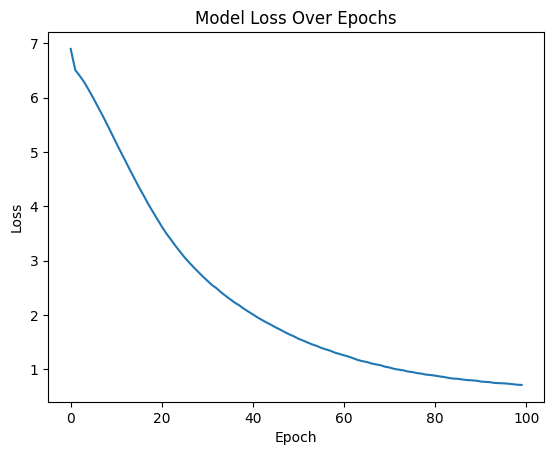

In [36]:
import matplotlib.pyplot as plt

# Plot training history
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model Loss Over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_history(history)
